In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [2]:
survey = pd.read_csv("Student Stress Level Survey (Responses) - Form responses 1-2.csv")
kaggle = pd.read_csv("student_lifestyle_dataset.csv")
print(survey.shape,kaggle.shape)
survey.head()

(53, 8) (2000, 8)


,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,2001,3.0,9,2.0,1.0,3,2.20,Moderate
1,2002,2.0,7,0.5,4.0,3,3.76,Low
2,2003,2.0,7,1.0,6.0,1,3.00,Moderate
3,2004,3.0,6,2.0,3.0,5,4.00,High
4,2005,9.0,3,0.0,6.0,6,2.80,High


In [3]:
df = pd.concat([survey,kaggle],ignore_index=True)

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
if 'Student_ID' in df.columns:
    df = df.drop(columns=['Student_ID'])

In [7]:
df.isnull().sum()

,0
Study_Hours_Per_Day,0
Extracurricular_Hours_Per_Day,0
Sleep_Hours_Per_Day,0
Social_Hours_Per_Day,0
Physical_Activity_Hours_Per_Day,0
GPA,1
Stress_Level,0


In [8]:
df['GPA'].fillna(df['GPA'].median(),inplace= True)

/tmp/ipython-input-378145993.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GPA'].fillna(df['GPA'].median(),inplace= True)


In [9]:
le = LabelEncoder()
df['Stress_Level'] = le.fit_transform(df['Stress_Level'])

In [10]:
scale_cols = ['Study_Hours_Per_Day',
              'Extracurricular_Hours_Per_Day',
              'Sleep_Hours_Per_Day',
              'Social_Hours_Per_Day',
              'Physical_Activity_Hours_Per_Day',
              'GPA'
]
scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])

In [11]:
df.describe()

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
count,2.053000e+03,2.053000e+03,2.053000e+03,2.053000e+03,2.053000e+03,2.053000e+03,2053.000000
mean,6.852775e-16,3.460997e-17,4.568516e-16,2.076598e-17,-1.038299e-17,-5.883695e-17,0.825621
std,1.000244e+00,1.000244e+00,1.000244e+00,1.000244e+00,1.000244e+00,1.000244e+00,0.905789
min,-4.647526e+00,-1.504520e+00,-4.227132e+00,-1.607315e+00,-1.691385e+00,-9.584483e+00,0.000000
25%,-7.399951e-01,-7.938349e-01,-7.173299e-01,-8.951882e-01,-7.802607e-01,-6.434308e-01,0.000000
50%,1.630108e-02,-8.314981e-02,8.819837e-02,-6.437354e-02,-6.720697e-02,4.024727e-03,0.000000
75%,8.356220e-01,6.986038e-01,7.786512e-01,8.257850e-01,6.854609e-01,6.823114e-01,2.000000
max,2.915437e+00,5.602331e+00,1.526642e+00,1.953319e+00,3.458448e+00,2.748003e+00,2.000000


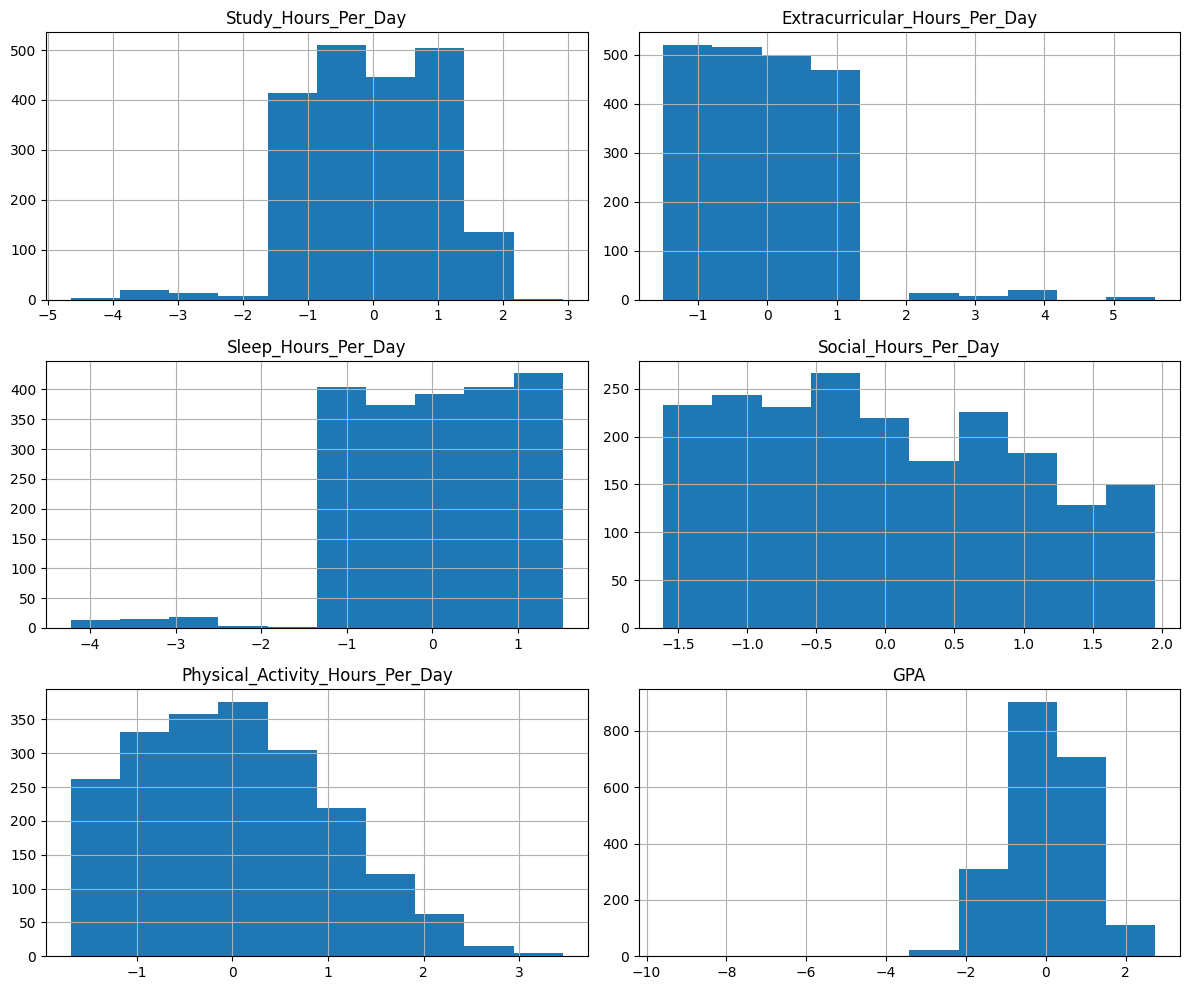

In [12]:
numeric_cols =['Study_Hours_Per_Day',
              'Extracurricular_Hours_Per_Day',
              'Sleep_Hours_Per_Day',
              'Social_Hours_Per_Day',
              'Physical_Activity_Hours_Per_Day',
              'GPA'
]
df[numeric_cols].hist(figsize=(12,10))
plt.tight_layout()
plt.show()

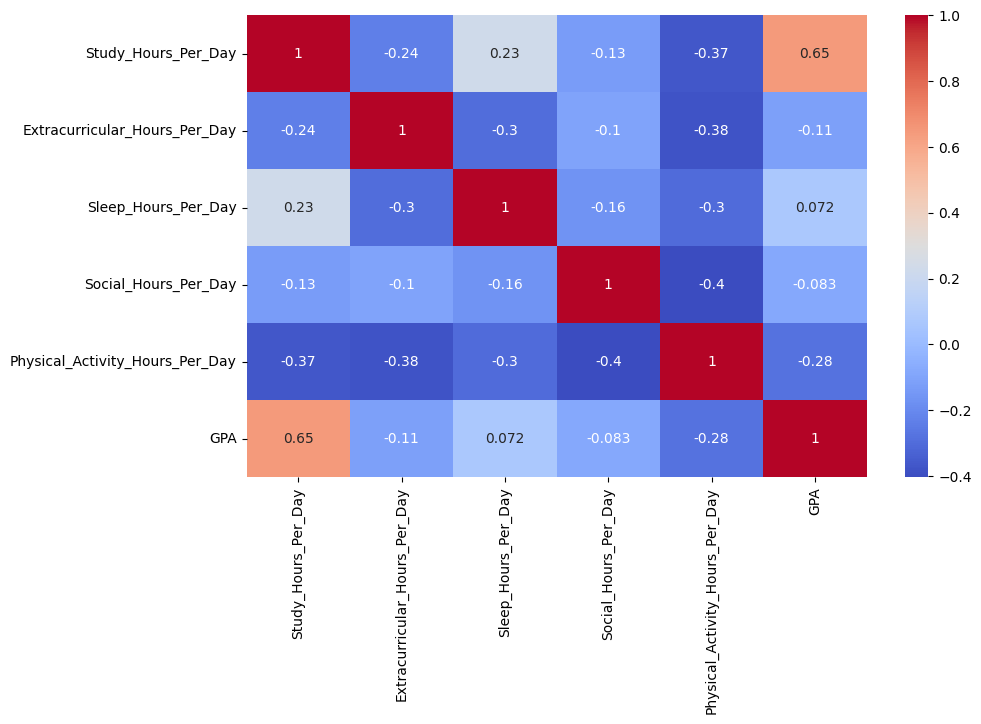

In [13]:
plt.figure(figsize=(10,6))
df_numeric = df.drop(columns=['Stress_Level'], errors='ignore')
sns.heatmap(df_numeric.corr(),annot=True,cmap='coolwarm')
plt.show()

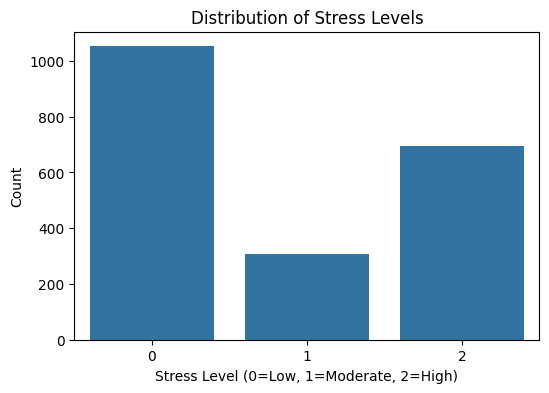

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Stress_Level', data=df)
plt.title("Distribution of Stress Levels")
plt.xlabel("Stress Level (0=Low, 1=Moderate, 2=High)")
plt.ylabel("Count")
plt.show()

In [15]:
target_col = 'Stress_Level'
X = df.drop(columns=[target_col])
y = df[target_col]

In [16]:
x_train,x_test,y_train,y_test = train_test_split(X , y , test_size = 0.2 ,random_state = 42 ,stratify = y)

In [17]:
non_ensemble_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier()
}

In [18]:
print("\n--- Non-Ensemble Table 1: Training Performance (CV) ---")
print(f"{'Model':<20} | {'CV Accuracy':<12} | {'Precision':<10} | {'Recall':<10} | {'F1-Score':<10}")
print("-" * 75)

for name, model in non_ensemble_models.items():
    # 1. Cross-Validation (5 Folds) for Stability
    cv_acc = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy').mean()

    # 2. Fit on full training data to get other metrics
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)

    # Calculate metrics on Training Data
    prec = precision_score(y_train, y_train_pred, average='weighted')
    rec = recall_score(y_train, y_train_pred, average='weighted')
    f1 = f1_score(y_train, y_train_pred, average='weighted')

    print(f"{name:<20} | {cv_acc:.3f}        | {prec:.3f}      | {rec:.3f}     | {f1:.3f}")


--- Non-Ensemble Table 1: Training Performance (CV) ---
Model                | CV Accuracy  | Precision  | Recall     | F1-Score  
---------------------------------------------------------------------------
Logistic Regression  | 0.813        | 0.813      | 0.815     | 0.814
Decision Tree        | 0.985        | 1.000      | 1.000     | 1.000
KNN                  | 0.866        | 0.925      | 0.925     | 0.924


In [19]:
print("\n--- Non-Ensemble Table 2: Testing Performance ---")
print(f"{'Model':<20} | {'Accuracy':<12} | {'Precision':<10} | {'Recall':<10} | {'F1-Score':<10}")
print("-" * 75)

for name, model in non_ensemble_models.items():
    # Predict on Test Set (Model is already fitted from loop above)
    y_test_pred = model.predict(x_test)

    acc = accuracy_score(y_test, y_test_pred)
    prec = precision_score(y_test, y_test_pred, average='weighted')
    rec = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')

    print(f"{name:<20} | {acc:.3f}        | {prec:.3f}      | {rec:.3f}     | {f1:.3f}")


--- Non-Ensemble Table 2: Testing Performance ---
Model                | Accuracy     | Precision  | Recall     | F1-Score  
---------------------------------------------------------------------------
Logistic Regression  | 0.813        | 0.819      | 0.813     | 0.814
Decision Tree        | 0.981        | 0.981      | 0.981     | 0.981
KNN                  | 0.895        | 0.894      | 0.895     | 0.894


In [20]:
ensemble_models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(algorithm='SAMME', random_state=42)
}

In [21]:
param_grids = {
    "Random Forest": {'n_estimators': [50, 100], 'max_depth': [10, 20, None]},
    "Gradient Boosting": {'n_estimators': [50, 100], 'learning_rate': [0.1, 0.2]},
    "AdaBoost": {'n_estimators': [50, 100], 'learning_rate': [0.1, 1.0]}
}

In [22]:
before_tuning_results = []
after_tuning_results = []
best_params_storage = []

In [ ]:
for name, model in ensemble_models.items():
    print(f"Processing {name}...")

    # Train with default settings
    model.fit(x_train, y_train)
    y_pred_before = model.predict(x_test)

    # Calculate Scores
    acc_b = accuracy_score(y_test, y_pred_before)
    prec_b = precision_score(y_test, y_pred_before, average='weighted')
    rec_b = recall_score(y_test, y_pred_before, average='weighted')
    f1_b = f1_score(y_test, y_pred_before, average='weighted')

    before_tuning_results.append([name, acc_b, prec_b, rec_b, f1_b])


    # Use GridSearchCV with 5-fold Cross-Validation
    grid = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy')
    grid.fit(x_train, y_train)

    # Get the best model and parameters
    best_model = grid.best_estimator_
    best_params_storage.append([name, str(grid.best_params_)])


    # Test the new "Best" model
    y_pred_after = best_model.predict(x_test)

    # Calculate Scores
    acc_a = accuracy_score(y_test, y_pred_after)
    prec_a = precision_score(y_test, y_pred_after, average='weighted')
    rec_a = recall_score(y_test, y_pred_after, average='weighted')
    f1_a = f1_score(y_test, y_pred_after, average='weighted')

    after_tuning_results.append([name, acc_a, prec_a, rec_a, f1_a])

Processing Random Forest...
Processing Gradient Boosting...
Processing AdaBoost...


/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 

In [ ]:
print("\n--- Table 1: Ensemble Performance BEFORE Tuning ---")
print(f"{'Model':<20} | {'Accuracy':<12} | {'Precision':<10} | {'Recall':<10} | {'F1-Score':<10}")
print("-" * 75)
for row in before_tuning_results:
    name, acc, prec, rec, f1 = row
    print(f"{name:<20} | {acc:.3f}        | {prec:.3f}      | {rec:.3f}     | {f1:.3f}")


--- Table 1: Ensemble Performance BEFORE Tuning ---
Model                | Accuracy     | Precision  | Recall     | F1-Score  
---------------------------------------------------------------------------
Random Forest        | 0.983        | 0.983      | 0.983     | 0.983
Gradient Boosting    | 0.983        | 0.983      | 0.983     | 0.983
AdaBoost             | 0.988        | 0.988      | 0.988     | 0.988


In [ ]:
print("\n\n--- Table 2: Hyperparameter Details (Best Values) ---")
print(f"{'Model':<20} | {'Best Parameters Found'}")
print("-" * 80)
for row in best_params_storage:
    print(f"{row[0]:<20} | {row[1]}")



--- Table 2: Hyperparameter Details (Best Values) ---
Model                | Best Parameters Found
--------------------------------------------------------------------------------
Random Forest        | {'max_depth': 10, 'n_estimators': 50}
Gradient Boosting    | {'learning_rate': 0.1, 'n_estimators': 50}
AdaBoost             | {'learning_rate': 1.0, 'n_estimators': 50}


In [ ]:
print("\n\n--- Table 3: Ensemble Performance AFTER Tuning ---")
print(f"{'Model':<20} | {'Accuracy':<12} | {'Precision':<10} | {'Recall':<10} | {'F1-Score':<10}")
print("-" * 75)
for row in after_tuning_results:
    name, acc, prec, rec, f1 = row
    print(f"{name:<20} | {acc:.3f}        | {prec:.3f}      | {rec:.3f}     | {f1:.3f}")



--- Table 3: Ensemble Performance AFTER Tuning ---
Model                | Accuracy     | Precision  | Recall     | F1-Score  
---------------------------------------------------------------------------
Random Forest        | 0.983        | 0.983      | 0.983     | 0.983
Gradient Boosting    | 0.988        | 0.988      | 0.988     | 0.988
AdaBoost             | 0.988        | 0.988      | 0.988     | 0.988


In [ ]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier( random_state=42)
}

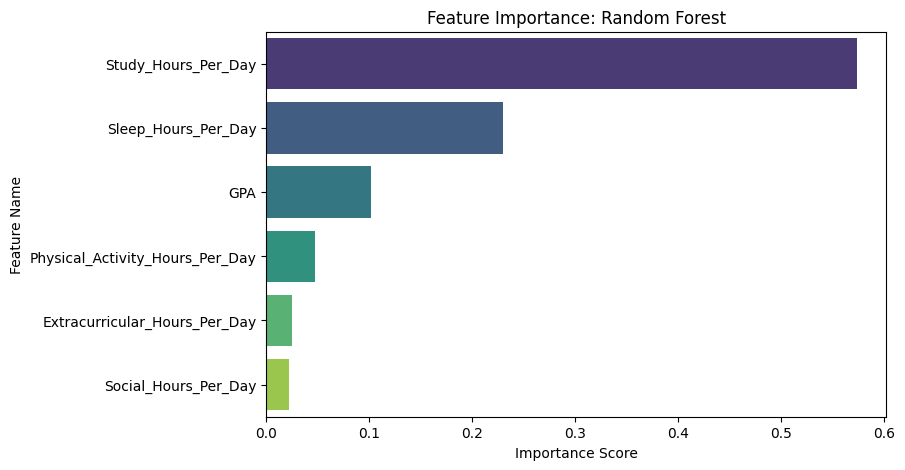

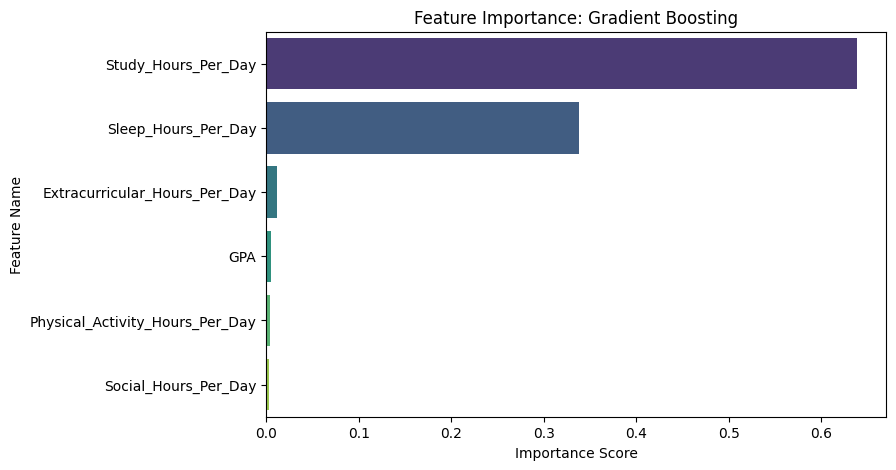

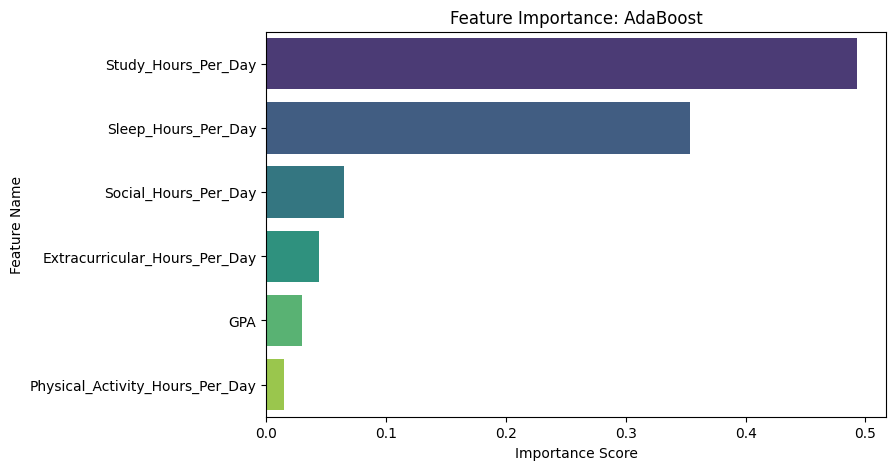

In [ ]:
for name, model in models.items():
    model.fit(x_train, y_train)

    importances = model.feature_importances_


    feature_data = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    })
    feature_data = feature_data.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(8, 5))
    sns.barplot(x='Importance', y='Feature', hue='Feature', data=feature_data, palette='viridis', legend=False)

    plt.title(f"Feature Importance: {name}")
    plt.xlabel("Importance Score")
    plt.ylabel("Feature Name")
    plt.show()

In [ ]:
!pip install shap --quiet

<Figure size 1000x600 with 0 Axes>

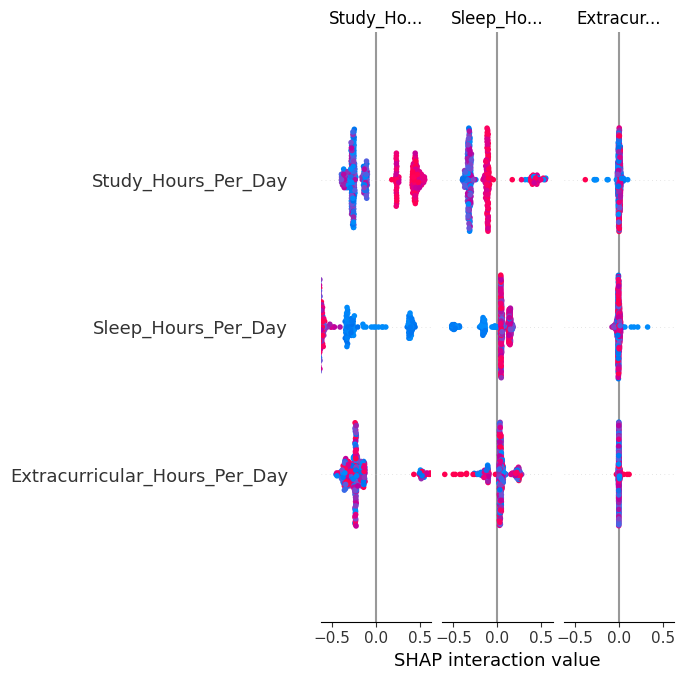

In [ ]:
import shap

best_model = ensemble_models["Random Forest"]
best_model.fit(x_train, y_train)

explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(x_test)

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, x_test, feature_names=X.columns)

In [ ]:
!pip install gradio --quiet

In [ ]:
import gradio as gr


from sklearn.ensemble import RandomForestClassifier
ui_model = RandomForestClassifier(n_estimators=100, random_state=42)
ui_model.fit(x_train, y_train)

def predict_stress(study, extra, sleep, social, physical, gpa):
    try:
        if any(v is None for v in [study, extra, sleep, social, physical, gpa]):
            return "Error: Please fill in all number fields."


        cols = ['Study_Hours_Per_Day',
                'Extracurricular_Hours_Per_Day',
                'Sleep_Hours_Per_Day',
                'Social_Hours_Per_Day',
                'Physical_Activity_Hours_Per_Day',
                'GPA']

        input_data = pd.DataFrame([[study, extra, sleep, social, physical, gpa]], columns=cols)


        scaled_input = scaler.transform(input_data)

        prediction = ui_model.predict(scaled_input)

        result_name = le.inverse_transform(prediction)[0]
        return f"Predicted Stress Level: {result_name}"

    except Exception as e:
        return f"Error Details: {str(e)}"

iface = gr.Interface(
    fn=predict_stress,
    inputs=[
        gr.Number(label="Study Hours", value=5),
        gr.Number(label="Extracurricular Hours", value=1),
        gr.Number(label="Sleep Hours", value=7),
        gr.Number(label="Social Hours", value=2),
        gr.Number(label="Physical Activity", value=1),
        gr.Number(label="GPA", value=3.0),
    ],
    outputs="text",
    title="Student Stress Prediction System",
    description="Enter details to predict stress."
)

iface.launch(share=True, debug=True)